In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set_palette('colorblind')

In [2]:
terrorism = pd.read_excel('globalterrorismdb_0718dist.xlsx')

In [3]:
terrorism.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terrorism.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaT,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaT,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaT,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaT,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaT,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(55), int64(22), object(57)
memory usage: 187.1+ MB


# We will work with a dataset that provides information about all terrorist attacks between 1970 and 2017.(With the exception of 1993, but that doesn't matter much for this) First we will find out, how the number of terrorist attacks, people killed by terrorist attacks and people wounded by terrorist attacks developed since 1970 

In [11]:
counted = terrorism['iyear'].value_counts().sort_index()

In [12]:
def line_plot(data, title, datatype='Series', labels=None):
    plt.figure(figsize=(12,8))
    if datatype == 'df':
        for col, label in zip(data.columns, labels):
            sns.lineplot(data.index, data[col], label=label)
        plt.legend()
    elif datatype == 'Series':
        sns.lineplot(data.index, data)
    sns.despine(left=True,bottom=True)
    plt.title(title, size=20)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(np.arange(1970,2021, 10))


## Below we can see that the number of terrorist attacks per year rose steadily since the middle of the 00 years, but was declining from 2014 to 2017

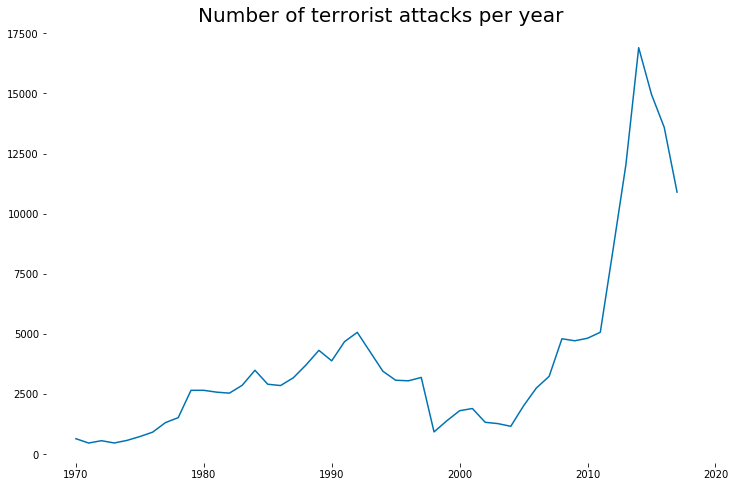

In [13]:
line_plot(counted, 'Number of terrorist attacks per year')

# Maybe the picture differs if consider plot the number of people wounded/killed by terrorist attacks per year

In [14]:
kill_wound_year = terrorism.pivot_table(index='iyear', values=['nwound','nkill'], aggfunc=sum)

## We can see that the number of people killed/wounded didn't always develop similarly as the number of attacks per year. But as the number of attacks declined the last years, the number of people killed/wounded per year did as well. 

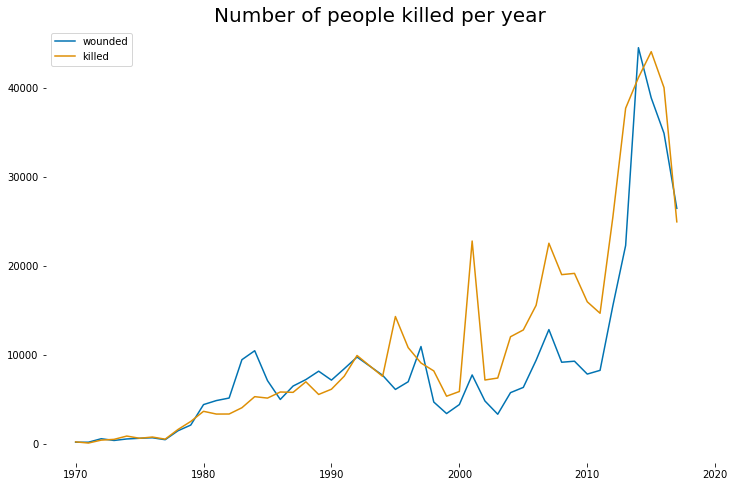

In [15]:
line_plot(kill_wound_year, 'Number of people killed per year','df',['wounded','killed'])

# Maybe the recent decrease in the number of terrorist attacks as well as number of people wounded/killed by them is due to the developments in certain regions of the world

In [16]:
wounded_region = terrorism.pivot_table(index='iyear', values='nwound', columns='region_txt', aggfunc=sum).fillna(0)

In [17]:
killed_region = terrorism.pivot_table(index='iyear', values='nkill', columns='region_txt', aggfunc=sum).fillna(0)

In [18]:
terrorism['count'] = 1
number_region = terrorism.pivot_table(index='iyear', values='count', columns='region_txt', aggfunc=sum)

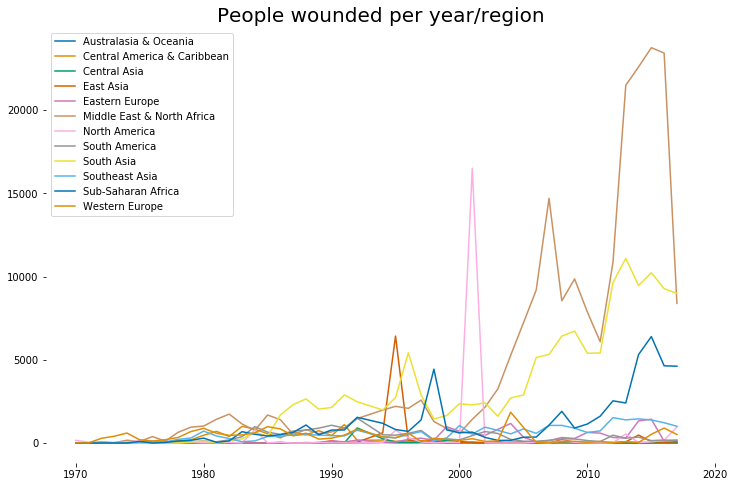

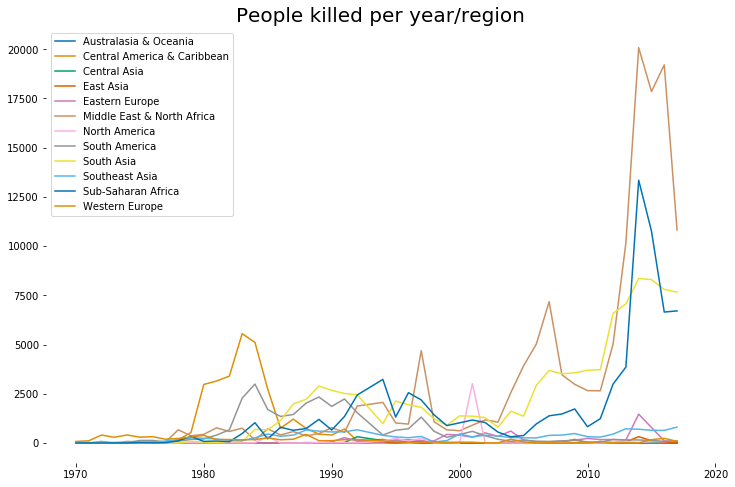

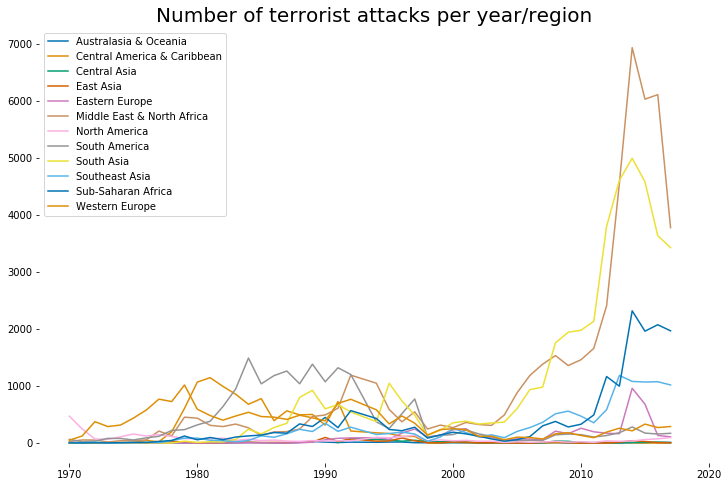

In [19]:
line_plot(wounded_region, 'People wounded per year/region','df',wounded_region.columns)
line_plot(killed_region, 'People killed per year/region','df',killed_region.columns)
line_plot(number_region, 'Number of terrorist attacks per year/region','df', number_region.columns)

# Unfortunately, the plots above are not very easy to interpret, due to too many  regions. In the new millenium, there clearly are three dominant regions in all three measurements plotted above. To be able show the trends more clearly I'll plot those three regions and the sum of all other regions below.

In [20]:
not_top_three = [x for x in terrorism['region_txt'].unique().tolist() \
                 if x not in ('South Asia', 'Middle East & North Africa', 'Sub-Saharan Africa')]

In [21]:
not_top_three

['Central America & Caribbean',
 'North America',
 'Southeast Asia',
 'Western Europe',
 'East Asia',
 'South America',
 'Eastern Europe',
 'Australasia & Oceania',
 'Central Asia']

In [22]:
three_plus_rest = terrorism
three_plus_rest['region_txt'] = three_plus_rest['region_txt'].replace(not_top_three, 'Rest of the world')

In [29]:
three_wounded = three_plus_rest.pivot_table(index='iyear', values='nwound', columns='region_txt', aggfunc=sum).fillna(0)
three_killed = three_plus_rest.pivot_table(index='iyear', values='nkill', columns='region_txt', aggfunc=sum).fillna(0)
three_number = three_plus_rest.pivot_table(index='iyear', values='count', columns='region_txt', aggfunc=sum)

# It appears that the last years, in each measurement and for all regions plotted, it got better. Especially the Middle East & North Africa was far better off in 2017 than in 2016 when it comes to terrorism.

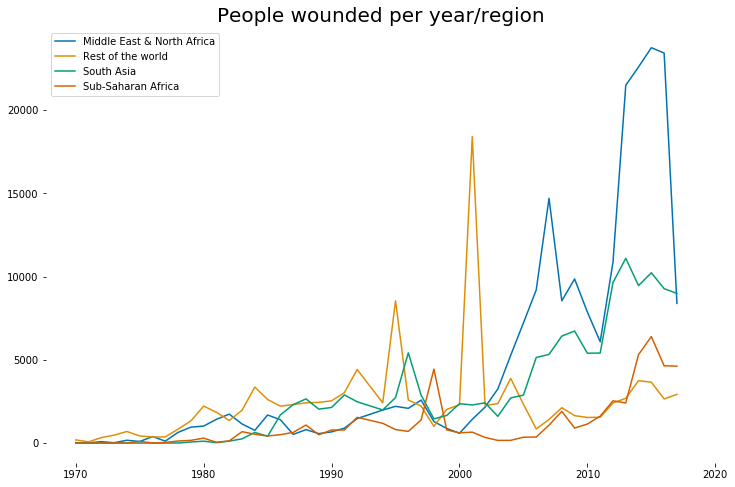

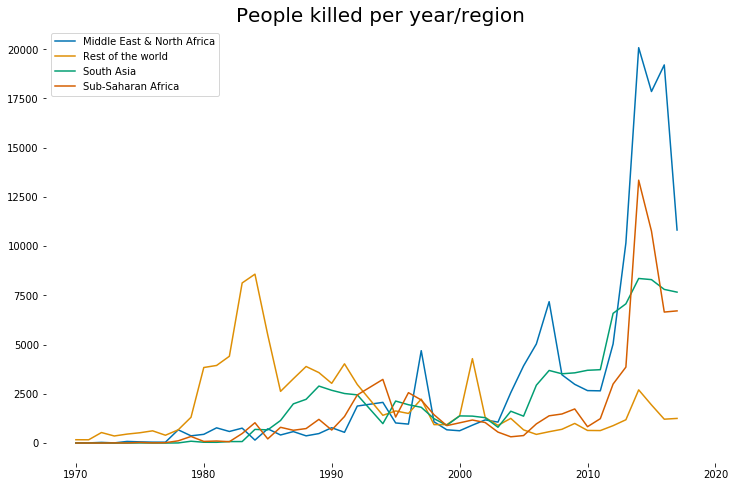

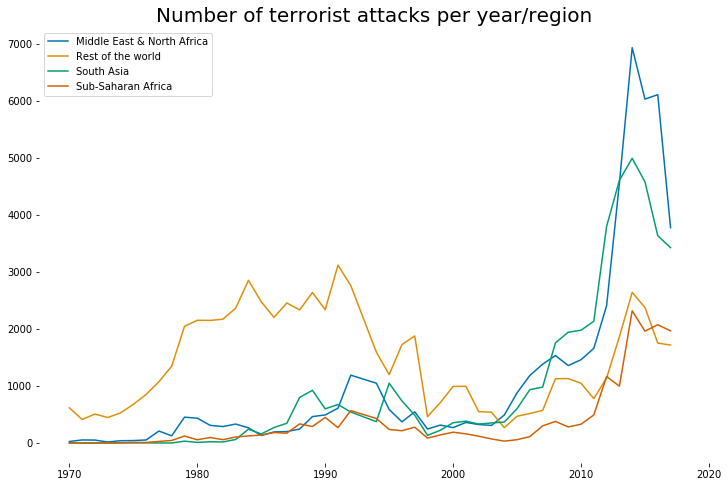

In [31]:
line_plot(three_wounded, 'People wounded per year/region','df',three_wounded.columns)
line_plot(three_killed, 'People killed per year/region','df',three_killed.columns)
line_plot(three_number, 'Number of terrorist attacks per year/region','df',three_number.columns)

# Another thing that stands out watching the plots we've seen so far are that the different figures are only loosely similar if it comes to the three measurements. One would expect an almost perfect correlation between people wounded per year, people killed and terrorist attacks per year. Therefore I'll plot the correlations between them.

In [32]:
three_plus_rest.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,count
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02,1
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,PGIS,0,1,1,1,NaN,NaT,1
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT,1
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT,1
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT,1


In [33]:
three_wounded

region_txt,Middle East & North Africa,Rest of the world,South Asia,Sub-Saharan Africa
iyear,,,,
1970,5.0,187.0,20.0,0.0
1971,11.0,71.0,0.0,0.0
1972,83.0,326.0,0.0,0.0
1973,18.0,474.0,1.0,2.0
1974,168.0,694.0,2.0,1.0
1975,92.0,425.0,0.0,100.0
1976,388.0,364.0,3.0,1.0
1977,115.0,366.0,1.0,36.0
1978,641.0,836.0,2.0,121.0


In [52]:
def scatter_plot(xdata, ydata, title, xlabel, ylabel,):
    plt.figure(figsize=(10,10))
    sns.scatterplot(xdata, ydata)
    sns.despine(left=True,bottom=True)
    plt.title(title, size=20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

# As we see below, it appears that the both the number of people killed and the number of people wounded per year correlate with the number of terrorist attacks per year, but interestingly the number people wounded less. (Perhaps due to improving healthcare - we could do further research to check that)

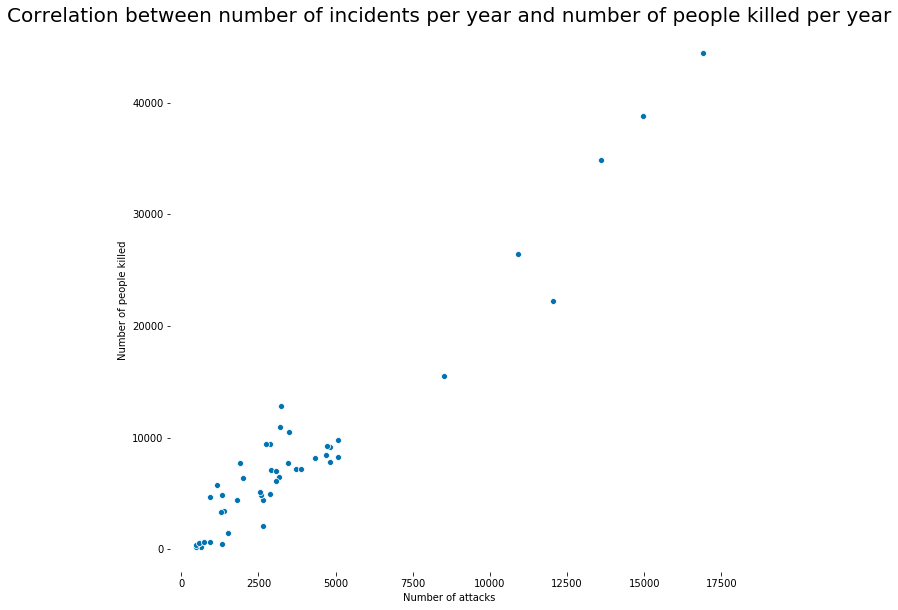

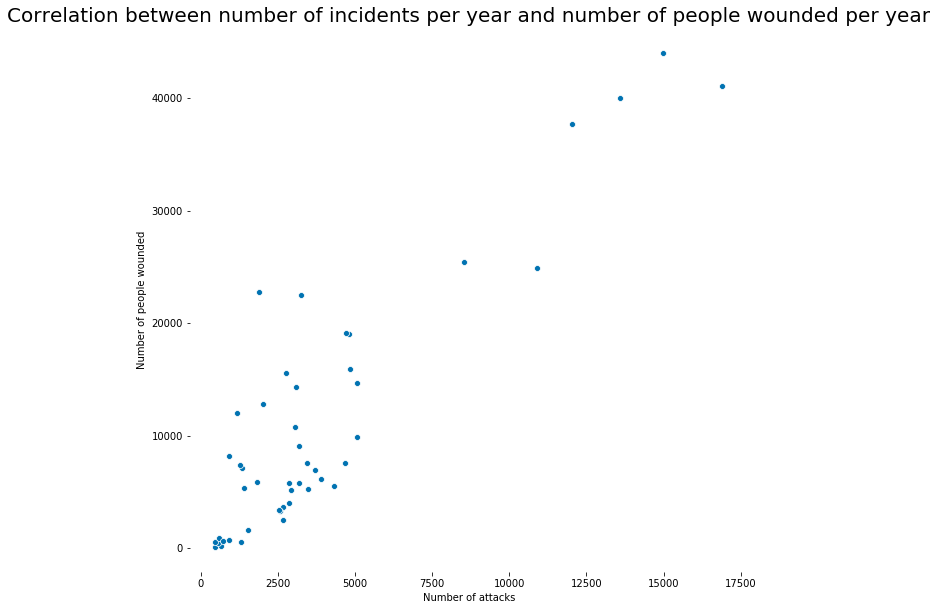

In [53]:
scatter_plot(counted, kill_wound_year['nkill'],\
             'Correlation between number of incidents per year and number of people killed per year',\
            'Number of attacks', 'Number of people killed')
scatter_plot(counted, kill_wound_year['nwound'],\
             'Correlation between number of incidents per year and number of people wounded per year',\
            'Number of attacks', 'Number of people wounded')

# To check the correlation between people wounded and people killed, we can directly plot each attack, we don't have to group by year.

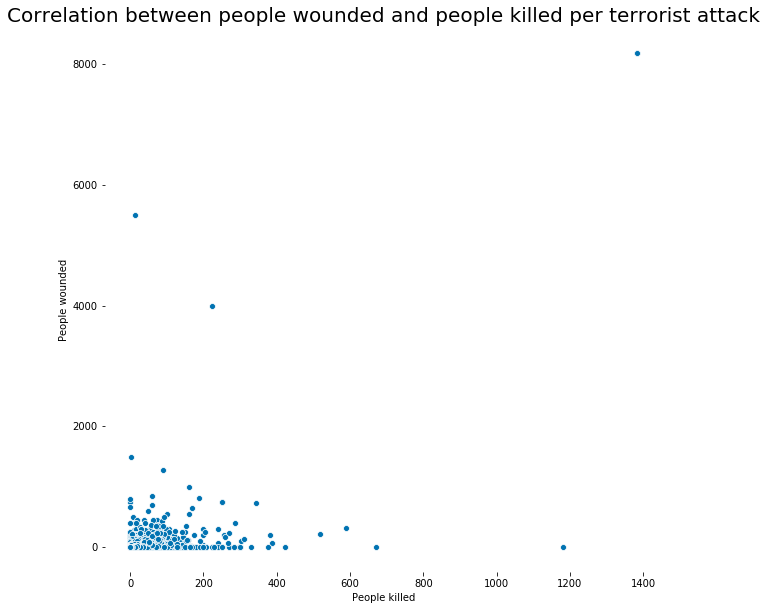

In [54]:
scatter_plot(terrorism['nkill'], terrorism['nwound'], 'Correlation between people wounded and people killed per terrorist attack','People killed', 'People wounded')

# Due to extreme outliers and many points around 0 this plot is not very informative about the correlation. Instead I will compute Pearson's Correlation Coefficient. As we see below, Pearson's R is 0.534375, which is less than one would expect. The reason for why this happened is another question we could do research about.

In [58]:
terrorism[['nkill','nwound']].corr()

,nkill,nwound
nkill,1.000000,0.534375
nwound,0.534375,1.000000


# A further problem with the correlation plot above is that due to the amount of points around 0, it was impossible to see how the values are distributed. Therefore I'll make histograms below:

In [72]:
def histogram(data, title):
    plt.figure(figsize=(12,8))
    data.hist(grid=False)
    sns.despine(left=True,bottom=True)
    plt.title(title, size=20)
    plt.ylabel('')
    plt.xlabel('')

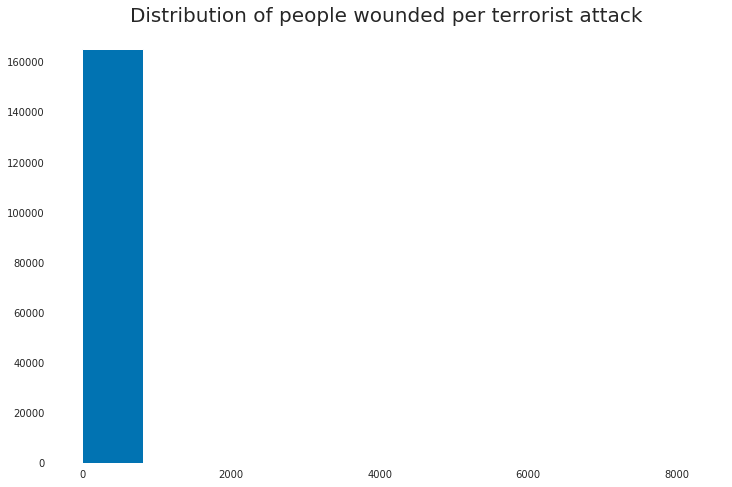

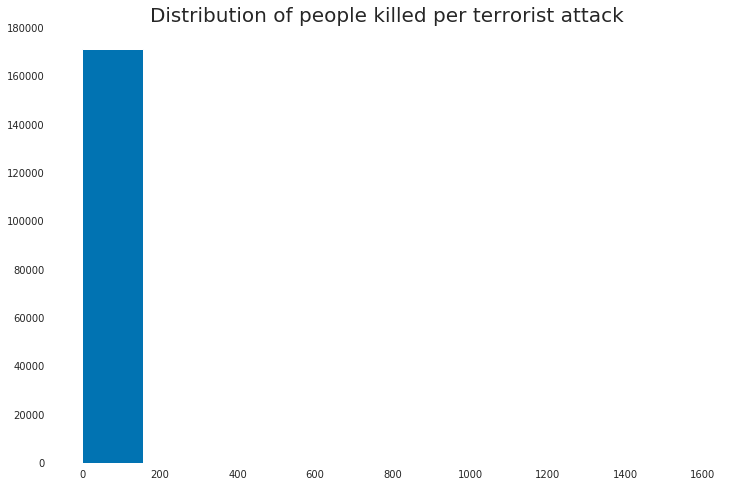

In [73]:
histogram(terrorism['nwound'], 'Distribution of people wounded per terrorist attack')
histogram(terrorism['nkill'], 'Distribution of people killed per terrorist attack')

In [131]:
def box(data, col, title, ylim=None):
    plt.figure(figsize=(12,8))
    if ylim is not None:
        plt.ylim(0,ylim)
    data.boxplot(col, grid=False)
    sns.despine(left=True,bottom=True)
    plt.title(title, size=20)
    plt.ylabel('')
    plt.xlabel('')

# As the distribution is extremely skewed, the histogram above is not very informative and tweeking the number of bins wouldn't help. For that reason I will instead try out using a boxplot and see if it is more informative.

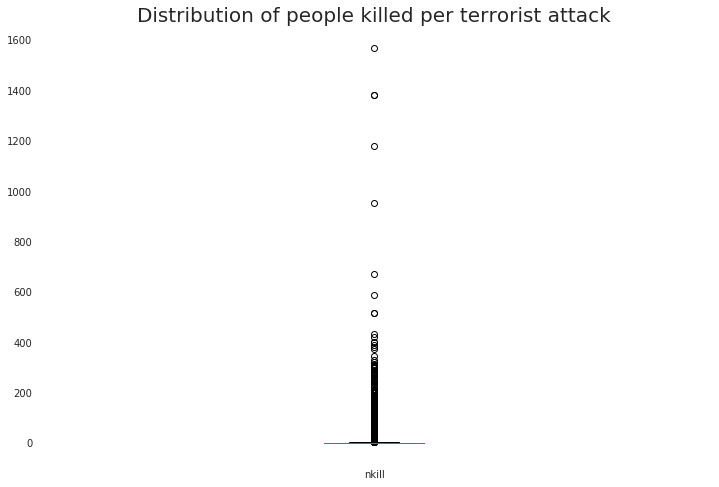

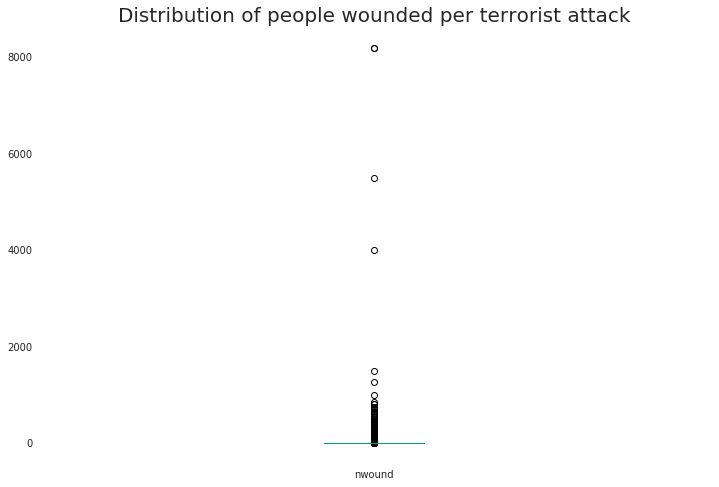

In [132]:
box(terrorism,'nkill', 'Distribution of people killed per terrorist attack')
box(terrorism,'nwound', 'Distribution of people wounded per terrorist attack')


# As there are extremely large and many outliers, the boxplots above are not very effective. In order to make this boxplot informative, I'll only show values that are not too huge

## According to the plot below, three quarters of terrorist attacks killed between  0 and 5 persons. The median lies at 0, which means that at least half of all terrorist attacks killed nobody. The same is true for the number of people wounded.

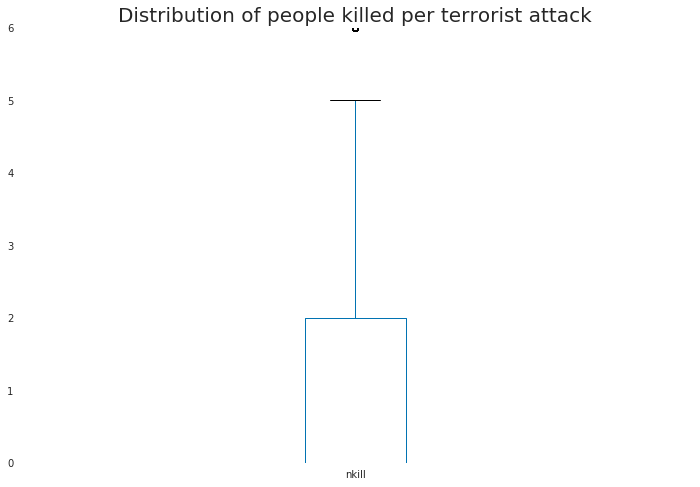

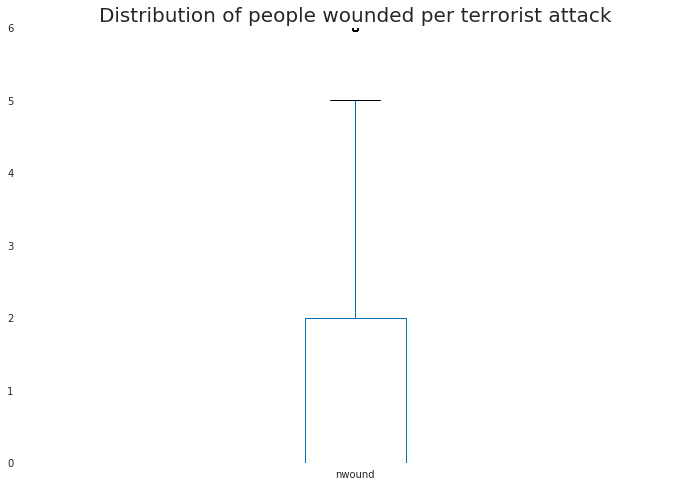

In [133]:
box(terrorism,'nkill', 'Distribution of people killed per terrorist attack', 6)
box(terrorism,'nwound', 'Distribution of people wounded per terrorist attack', 6)
